# This notebook is for May 2019 stationary data Cleaning & EDA

### Import needed modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in pkl file for analysis

In [3]:
may_df = pd.read_pickle('../data/may.pkl')
may_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247000,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
1,2019-05-01 00:01:41.247000,36.191252,-86.772945,PoweredXWRWC,35.0,Bird
2,2019-05-01 00:01:41.247000,36.144752,-86.806293,PoweredMEJEH,90.0,Bird
3,2019-05-01 00:01:41.247000,36.162056,-86.774688,Powered1A7TC,88.0,Bird
4,2019-05-01 00:01:41.247000,36.150973,-86.783109,Powered2TYEF,98.0,Bird


In [4]:
may_df.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,Jump
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,Jump
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,Jump
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,Jump
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,Jump


### Check column attributes

In [5]:
may_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   chargelevel  float64
 5   companyname  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ GB


### Convert pubdatetime column from string to datetime format and create weekday column

In [6]:
may_df['pubdatetime'] = pd.to_datetime(may_df['pubdatetime'])
may_df['weekday'] = may_df['pubdatetime'].dt.weekday

### Check for null within columns

In [7]:
may_df.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
weekday          0
dtype: int64

### Drop nulls from chargelevel column

In [8]:
may_df.dropna(subset=['chargelevel'], inplace=True)
may_df.isnull().sum()

pubdatetime    0
latitude       0
longitude      0
sumdid         0
chargelevel    0
companyname    0
weekday        0
dtype: int64

### Count of scooters per company

In [9]:
may_co_cnt = may_df.groupby(['companyname'])['sumdid'].nunique().sort_values()
may_co_cnt

companyname
Gotcha     223
Bolt       346
Spin       685
Jump       976
Lyft      1376
Lime      1631
Bird      3064
Name: sumdid, dtype: int64

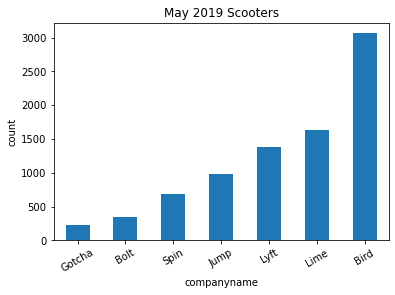

In [10]:
may_co_bar = may_co_cnt.plot.bar('companyname', 'sumdid', rot=30, title='May 2019 Scooters').set_ylabel('count')

### Check for dups within sumdid

In [11]:
may_df.sumdid.nunique()

8301

In [12]:
may_df.describe(include='O') # may not be useful

,sumdid,companyname
count,20283299,20283299
unique,8301,7
top,PoweredIE7H5RIN474PE,Lime
freq,8921,7111655


### Round latitude and longitude

In [13]:
may_df = may_df.round({'latitude': 3})

may_df = may_df.round({'longitude': 3})

### Sort dataframes by sumdid and pubdatetime

In [14]:
may_df.sort_values(by=['sumdid','pubdatetime'], inplace=True)
may_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,weekday
12757337,2019-05-24 00:04:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4
12761150,2019-05-24 00:09:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4
12765093,2019-05-24 00:14:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4
12769113,2019-05-24 00:19:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4
12773048,2019-05-24 00:24:43,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4


### Find when scooter is taken on a trip

In [15]:
may_df['prv_latitude'] = may_df.groupby(['sumdid'])['latitude'].shift(1)
may_df['prv_longitude'] = may_df.groupby(['sumdid'])['longitude'].shift(1)
may_df['nxt_latitude'] = may_df.groupby(['sumdid'])['latitude'].shift(-1)
may_df['nxt_longitude'] = may_df.groupby(['sumdid'])['longitude'].shift(-1)
may_df['dff_prv_latitude'] = may_df['prv_latitude'] - may_df['latitude']
may_df['dff_prv_longitude'] = may_df['prv_longitude'] - may_df['longitude']
may_df['dff_nxt_latitude'] = may_df['latitude'] - may_df['nxt_latitude']
may_df['dff_nxt_longitude'] = may_df['longitude'] - may_df['nxt_longitude']
may_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,weekday,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude
12757337,2019-05-24 00:04:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,NaN,NaN,36.162,-86.775,NaN,NaN,0.0,0.0
12761150,2019-05-24 00:09:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0
12765093,2019-05-24 00:14:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0
12769113,2019-05-24 00:19:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0
12773048,2019-05-24 00:24:43,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0


### Calculate how long scooter is unused

In [16]:
may_df['shft_time'] = may_df.groupby(['sumdid'])['pubdatetime'].shift(-1)
may_df['shft_elaspe_time'] = may_df['shft_time'] - may_df['pubdatetime']
may_df['dff_time'] = may_df.groupby(['latitude', 'longitude'])['pubdatetime'].diff().fillna(pd.Timedelta(0))
may_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,weekday,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude,shft_time,shft_elaspe_time,dff_time
12757337,2019-05-24 00:04:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,NaN,NaN,36.162,-86.775,NaN,NaN,0.0,0.0,2019-05-24 00:09:42,0 days 00:05:00,0 days 00:00:00
12761150,2019-05-24 00:09:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,2019-05-24 00:14:42,0 days 00:05:00,0 days 00:05:00
12765093,2019-05-24 00:14:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,2019-05-24 00:19:42,0 days 00:05:00,0 days 00:05:00
12769113,2019-05-24 00:19:42,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,2019-05-24 00:24:43,0 days 00:05:01,0 days 00:05:00
12773048,2019-05-24 00:24:43,36.162,-86.775,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt,4,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,2019-05-24 00:29:43,0 days 00:05:00,0 days 00:05:01


### Reorganize columns

In [17]:
may_df = may_df[['pubdatetime', 'dff_time', 'shft_time', 'shft_elaspe_time', 'weekday', 'latitude', 'longitude', 'prv_latitude', 'prv_longitude', 'nxt_latitude', 'nxt_longitude', 'dff_prv_latitude', 'dff_prv_longitude', 'dff_nxt_latitude', 'dff_nxt_longitude', 'sumdid', 'chargelevel', 'companyname']]
may_df.head()

,pubdatetime,dff_time,shft_time,shft_elaspe_time,weekday,latitude,longitude,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude,sumdid,chargelevel,companyname
12757337,2019-05-24 00:04:42,0 days 00:00:00,2019-05-24 00:09:42,0 days 00:05:00,4,36.162,-86.775,NaN,NaN,36.162,-86.775,NaN,NaN,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
12761150,2019-05-24 00:09:42,0 days 00:05:00,2019-05-24 00:14:42,0 days 00:05:00,4,36.162,-86.775,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
12765093,2019-05-24 00:14:42,0 days 00:05:00,2019-05-24 00:19:42,0 days 00:05:00,4,36.162,-86.775,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
12769113,2019-05-24 00:19:42,0 days 00:05:00,2019-05-24 00:24:43,0 days 00:05:01,4,36.162,-86.775,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt
12773048,2019-05-24 00:24:43,0 days 00:05:01,2019-05-24 00:29:43,0 days 00:05:00,4,36.162,-86.775,36.162,-86.775,36.162,-86.775,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,Bolt


### Export cleaned file to pkl

In [18]:
may_df.to_pickle('../data/may_cleaned.pkl')